In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
def rotation(start, end, angle):
    M = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle), np.cos(angle)]]) 
    D = start + M@(end-start)
    return D

In [10]:
# Comencem construint una funció, la qual, anomenarem cantor_set(). Els paràmetres d'aquesta funció seran els següents:
# a0 = Coordenada x del punt 'a'
# a1 = Coordenada y del punt 'a'
# b0 = Coordenada x del punt 'b'
# b1 = Coordenada y del punt 'b'
# ite = nombre d'iteracions
def cantor_set(a0,b0,a1,b1,ite):
    # Primer condicional.
    if ite==0:
        #Usem les coordenades 'x' i 'y' de 'a' i 'b' per construir l'iniciador.
        plt.plot([a0,b0],[a1,b1],color='black')
    # Segon condicional.
    else:
        # Mitjançant operacions, trobem les coordenades 'c0' i 'd0' en l'eix 'x'.
        c0=a0+(b0-a0)/3.0
        d0=a0+2*(b0-a0)/3.0
        # Cridem a la funció cantor_set() i afegint els nous paràmetres construïm el 1r generador.
        cantor_set(a0,c0,a1-0.05,a1-0.05,ite-1)
        cantor_set(d0,b0,b1-0.05,b1-0.05,ite-1)

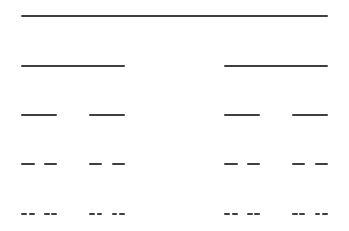

In [11]:
# Dibuixem el conjunt un nombre 'k' d'iteracions.
for k in range(0,5):
    cantor_set(0,1,0,0,k)
    plt.axis('off')

## Triangle Sierpinski

(-0.05, 1.05, -0.04330127018922193, 0.9093266739736605)

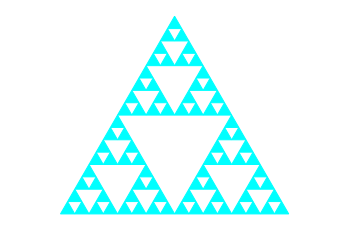

In [13]:
# Definim la nostra funció com a triangle amb els paràmetres següents:
# ite = iteracions
# x,y,z = punts en el pla
def triangle(x,y,z,ite):
    # Fem un condicional per a l'iniciador.
    if ite == 0:
        #Tracem un triangle amb els punts a, b, c
        plt.fill([x[0],y[0],z[0],x[0]],[x[1],y[1],z[1],x[1]], color = 'cyan')
    # Segon condicional per trobar altres punts.    
    else:
        # Definim els punts u, v, w. Per fer-ho, operem amb els punts x i y.
        u = x + (z-x)/2
        v = z + (y-z)/2
        w = x + (y-x)/2
        # Tracem el 1r generador amb la funció triangle.
        triangle(x,w,u,ite-1)
        triangle(w,y,v,ite-1)
        triangle(u,v,z,ite-1)

# Agafem els punts a, b, c com a valors inicials al pla.
a = np.array([0,0])
b = np.array([1,0])
c = rotation(a,b,np.pi/3)

# Passem els punts com a valors de la funció triangle() i li assignem 4 iteracions. 
triangle(a,b,c,4,)
plt.axis('equal')
plt.axis('off')

# Sierpinski tetrahedron

(-2.2575538031964952, 1.3468492021345388, -0.125, 2.625)

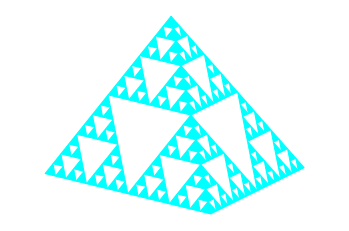

In [15]:
# Per a construir el tetraedre reutilitzarem el codi del triangle i afegirem algunes ordres més.
# Agafarem els punts 'b' i 'c' com a punts inicials.
b = np.array([0,0])
c = np.array([-0.5,2.5])
# Per trobar 'a' construirem una recta 'cb' i la rotarem amb la funció rotation() -50º.
# Per a 'd' rotarem la recta 'cd' 30º. 
a = rotation(c,b,-5*np.pi/18)
d = rotation(c,b,np.pi/6)
# Reutilitzem la funció triangle amb els nous punts i li afegirem 4 iteracions.
triangle(a,b,c,4)
triangle(b,d,c,4)
plt.axis('equal')
plt.axis('off')

# Dragon curve 

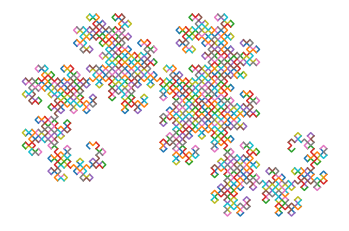

In [17]:
# Definim la nostra funció com a drac, i li agreguem els paràmetres següents:
# ite = iteracions
# x,y,z = valors al pla
def drac(x,y,z,ite):
    # El 1r condiconal servirà per generar l'iniciador. 
    if ite == 0:
        # Utilitzem els punts a(0,0), b(0.5,0.5) i c(1,0).
        plt.plot([x[0],y[0],z[0]],[x[1],y[1],z[1]])
    # En el 2n condicional generem dos punts: 'u' i 'v'.
    else:
        u = x + (z-x)/2
        v = rotation(x,u,np.pi/2)
        # Posem els paràmetres a la funció drac() i tracem el 1r generador.
        drac(x,v,y,ite-1)
        drac(z,u,y,ite-1)
        
# Agafem els punts 'a', 'b' i 'c' com a punts inicials.
a = np.array([0,0])
b = np.array([.5,.5])
c = np.array([1,0])

# Agafem els punts anteriors com a paràmetres en drac(). Iterem els punts 10 vegades.
drac(a,b,c,10)
plt.axis('equal')
plt.axis('off');

## Koch curve

In [17]:
# Començem definint la funció Koch amb els seus parèmetres
# ite = iteracions
# x,y = punts en el pla. 
def koch(x,y,ite): 
    # Fem un condicional per la iteració 0, es a dir el iniciador.
    if ite == 0:
        # Amb el plt.plot és traça una linia recta de a=(0,0) a b=(1,0) en el pla. 
        plt.plot([x[0],y[0]],[x[1],y[1]],color ='red')
    # Posem un segon condicional que servirà per construir altres punts i les iteracions del fractal.    
    else:
        # Definim els punts u, v, w. Per fer-ho operem amb els punts x i y.
        u = x + (y-x)/3
        v = x + 2 * (y-x)/3
        w = rotation(u,v,np.pi/3)
        # Un cop obtenim els punts utilitzem la funció koch per traçar el 1r generador
        koch(x,u,ite-1)
        koch(u,w,ite-1)
        koch(w,v,ite-1)
        koch(v,y,ite-1)
        

(-0.05, 1.05, -0.014433756729740644, 0.3031088913245535)

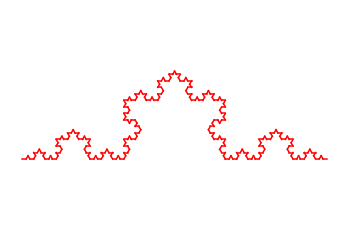

In [18]:
# Ara, per construir el fractal agafem els punts A i B com a punt de partida.
A = np.array([0,0])
B = np.array([1,0])
# Passem els punts A i B com a paràmetres de la funció koch i li assignem 4 iteracions.
koch(A,B,4)
plt.axis('equal')
plt.axis('off')

# Carpet Sierpinski

(-0.05, 1.05, -0.05, 1.05)

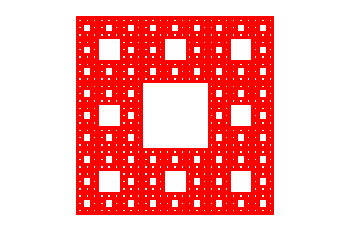

In [20]:
# Es defineix la funció com a carpet() i li posem els paràmetres següents:
# ite = iteracions.
# x,y,z,q = valors del pla.
def carpet(x,y,z,q,ite):
    # 1r Condicional per obtenir l'iniciador, en aquest cas, un quadrat.
    if ite == 0:
        # Amb el plt.fill es traça el quadrat seguint els punts A,B,C,D.
        plt.fill([x[0],y[0],z[0],q[0],x[0]],[x[1],y[1],z[1],q[1],x[1]],color ='red')
    # Amb el 2n Condicional s'obtenen més punts mitjançant operacions.   
    else:
        a = x + (y-x)/3
        b = x + 2*(y-x)/3
        c = y + (z-y)/3
        d = y + 2*(z-y)/3
        e = z + (q-z)/3
        f = z + 2*(q-z)/3
        g = q + (x-q)/3
        h = q + 2*(x-q)/3
        r = x + (z-x)/3
        s = y + (q-y)/3
        t = x + 2*(z-x)/3
        u = y + 2*(q-y)/3
        # Traçem el primer generador amb la funció carpet().
        carpet(x,a,r,h,ite-1)
        carpet(a,b,s,r,ite-1)
        carpet(b,y,c,s,ite-1)
        carpet(h,r,u,g,ite-1)
        carpet(s,c,d,t,ite-1)
        carpet(g,u,f,q,ite-1)
        carpet(u,t,e,f,ite-1)
        carpet(t,d,z,e,ite-1)
        
# Utilitzarem els punts següents com punts inicials.
a = np.array([0,0])
b = np.array([1,0])
c = np.array([1,1])
d = np.array([0,1])

# Per últim, agafem els punts anteriors com a paràmetres de carpet() i els iterem 4 vegades.
carpet(a,b,c,d,4)
plt.axis('equal')
plt.axis('off')

# Menger sponge

(-0.07651650429449552,
 1.606846590184406,
 -0.07651650429449552,
 1.606846590184406)

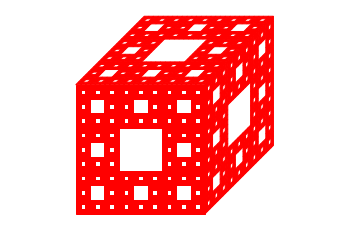

In [22]:
# Per construir l'esponja de Menger utilitzarem valors del codi de la catifa.
# Utilitzarem els punts a, b, c i d com a punts inicials. Aquests punts s'utilitzaran per generar els extrems del cub.
a = np.array([0,0])
b = np.array([1,0])
c = rotation(b,a,-np.pi/2)
d = rotation(a,b,np.pi/2)
# Per trobar 'e' es construeix una recta 'bc' i rotem -45º.
# En el cas de 'f' es construeix una recta 'cd' i es gira 135º.
# Per 'g' es gira una recta 'dc' 45º. 
e = rotation(b,c,-np.pi/4)
f = rotation(c,b,3*np.pi/4)
g = rotation(d,c,np.pi/4)
# Mitjançant operacions, obtenim tres punts més, els quals ens serviran per tancar el cub.
m = b + 3*(e-b)/4
n = c + 3*(f-c)/4
o = d + 3*(g-d)/4
# Amb la funció carpet() dibuixarem les cares del cub utilitzant els punts obtinguts com a paràmetres i els iterem 4 vegades.
carpet(a,b,c,d,3)
carpet(b,m,n,c,3)
carpet(d,c,n,o,3)
plt.axis('equal')
plt.axis('off')

# Peano Curve 

(-0.05, 1.05, -0.54320987654321, 0.54320987654321)

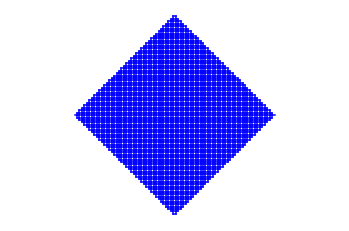

In [49]:
# Fem una nova funció anomenada peano(). Els seus paràmetres son els següents:
# ite = iteracions
# x,y = valors al pla
def peano(x,y,ite):
    # Amb el 1r condicional farem l'iniciador.
    if ite == 0:
        #Construim el nostre iniciador amb els punts x=(0,0) i y=(1,0). En aquest cas l'iniciador és una recta.
        plt.plot([x[0],y[0]],[x[1],y[1]],color ='blue')
    # El 2n condicional servirá per trobar els punts per obtenir el 1r generador.
    else:
        # Tracem els punts 'a' i 'b' mitjançant operacions.
        a = x + (y-x)/3
        b = x + 2*(y-x)/3
        # Per obtenir els següents punts utilitzarem rotacions.
        # Per obtenir 'c' girem una recta 'ab' 90º
        # Per obtenir 'd' girem una recta 'by' 90º
        # Per obtenir 'e' girem una recta 'ab' -90º
        # Per obtenir 'f' girem una recta 'by' -90º
        c = rotation(a,b,np.pi/2)
        d = rotation(b,y,np.pi/2)
        e = rotation(a,b,-np.pi/2)
        f = rotation(b,y,-np.pi/2)
        # El següent pas és traçar el 1r generador. Per fer-ho, utilitzarem la funció peano() i usarem de paràmetres els valors obtinguts anteriorment.
        peano(x,a,ite-1)
        peano(a,c,ite-1)
        peano(c,d,ite-1)
        peano(d,b,ite-1)
        peano(b,f,ite-1)
        peano(f,e,ite-1)
        peano(e,a,ite-1)
        peano(a,b,ite-1)
        peano(b,y,ite-1)
        
# Utilitzem els punts 'x' i 'y' com a punts inicials.
x = np.array([0,0]) 
y = np.array([1,0]) 

# Iterem els punts 'x' i 'y' 4 vegades. Obtenint la corba.
peano(x,y,4)
plt.axis('equal')
plt.axis('off')

# Hilbert Curve

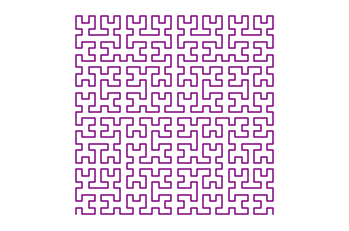

In [48]:
# Comencem fent una funció per trobar els punts per fer la corba. Aquesta funció l'anomenem points_hilbert().
def points_hilbert(ite):
    # Establim el 1r condicional per a la  iteració 0 amb els valors de x i y.
    if ite == 0:
        x = 0 
        y = 0    
    # El 2n condicional servirà per totes les iteracions majors que 1.
    else:
        x0,y0 = points_hilbert(ite-1)
        # Establim una malla d'1*1 que va des de -0.5 fins a 0.5. En ella trobarem tots els valors de x i y de tots els punts necessaris per construir la corba.
        x = 0.5*np.array([-0.5+y0,-0.5+x0,0.5+x0,0.5-y0])
        y = 0.5*np.array([-0.5+x0,0.5+y0,0.5+y0,-0.5-x0])
    # Dins del return guardem tots els valors de x i y que s'obtenen.    
    return x, y
    
# Fem una nova funció, anomenada plot_hilbert() i li afegim com a únic paràmetre n.
def plot_hilbert(n):
    # Utilitzem la funció points_hilbert() i li posem de paràmetre n.
    # n = nombre d'iteracions.    
    x,y = points_hilbert(n)
    # Canviem la funció points_hilbert() perquè pugui imprimir els valors com un espai 1-dimensional.
    X = np.reshape(x,4**n)
    Y = np.reshape(y,4**n)
    plt.plot(X,Y,color = 'purple')
    plt.axis('off')
    plt.axis('equal')
    
plot_hilbert(5)

# Julia Set

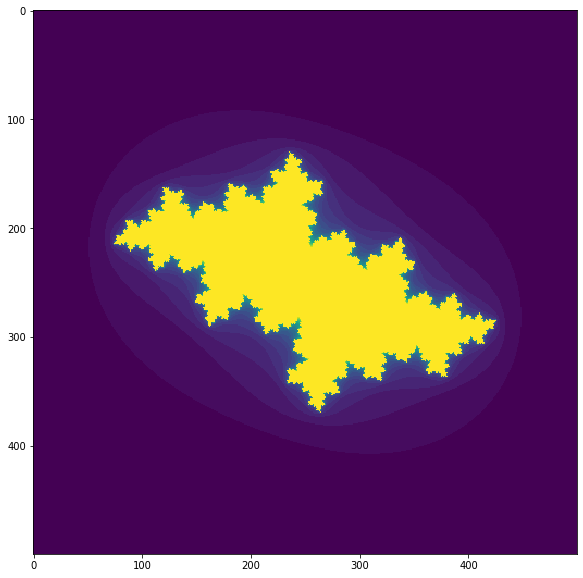

In [26]:
# Fem una nova funció, la qual, anomenarem max_iteration(). Els paràmetres d'aquesta funció seran:
# z = nombres complexos.
# c = nombre d'un complex concret.
def max_iteration(z,c,ite):
    # Utilitzem un bucle for, amb el qual, obtindrem la iteració 'k', on el valor del mòdul és |z| > 2.
    for k in range(ite):
        z = z**2+c
        if(abs(z)>2):
            break
    # Amb el return k, guardem l'última iteració on k és major de 2.        
    return k       
    
# Definim una nova funció com a plot_julia(). Els paràmetres de la funció son:
# n = nombre de punts en un rang de -2 a 2 per a 'x' i 'y'.
# c = nombre complex fix de la funció f(z) = z*z+c
# ite = nombre de iteracions
def plot_julia(n,c,ite):
    # Construïm dos eixos de -2 a 2 en 'x' i 'y'. 
    x = np.linspace(-2,2,n)
    y = np.linspace(-2,2,n)
    # Construïm una matriu de zeros de dimensió nxn.
    A = np.zeros((n,n))
    # Amb dos bucles for, construïm una malla de nombres complexos 'z' amb els valors 'x' i 'y'. 
    for p in range(n):
        for q in range(n):
            z = complex(x[p],y[q])
            # Actualitzem la matriu, substituint cada zero pel valor de 'k' que retorna la funció max_iteration().
            A[p,q] = max_iteration(z,c,ite)
    # Matriu actualitzada amb els valors de 'k' de cada complex 'z'. 
    return A
    
# Dibuixem el conjunt amb les següents caracteristiques:
# n = 500 punts
# c = -0.5-1j*0.5
# ite = 30
A = plot_julia(500,-0.5-1j*0.5,30)

# Amb la libreria matplotlib dibuixem la matriu A. 
plt.figure(figsize=(10, 10))
plt.imshow(A.T, interpolation="nearest");

# Mandelbrot Set

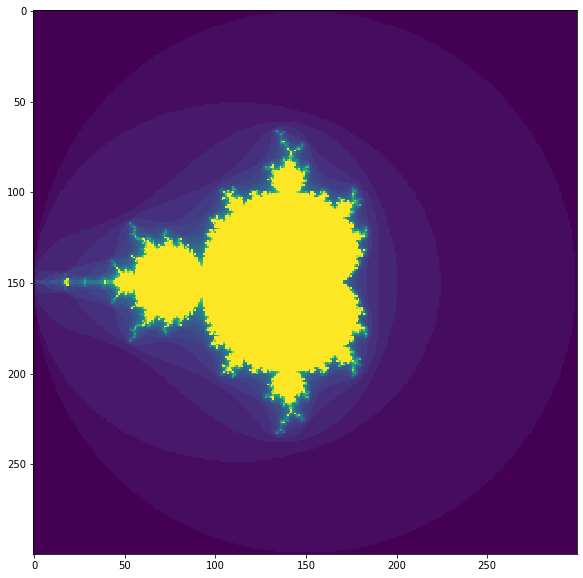

In [28]:
# Creem una nova funció, la qual anomenarem plot_mandelbrot(). Aquesta funció tindrà els paràmetres següents:
# n = nombre de punts en un rang de -2 a 2.
# ite = nombre d'iteracions.
def plot_mandelbrot(n,ite):
    # Construïm dos eixos de -2 a 2 en 'x' i 'y'. També farem una matriu de zeros de dimensió nxn.
    x = np.linspace(-2,2,n)
    y = np.linspace(-2,2,n)
    A = np.zeros((n,n))
    # Amb dos bucles for, construïm una malla de nombres complexos 'c' amb els valors 'x' i 'y'. 
    for p in range(n):
        for q in range(n):
            c = complex(x[p],y[q])
            # Actualitzem la matriu, substituint cada zero pel valor de 'k' que retorna la funció max_iteration(). En aquest cas, z = 0. Al definir'z' com a 0 estem actualitzant el valor de c.
            # c = tots el nombres complexos.
            A[p,q] = max_iteration(0,c,ite)
     # La matriu s'actualitzara amb els valors de 'A' obtinguts en cada nova iteració.        
    return A

# Ara imprimim els resultats amb 300 i 30 iteracions, per a la matriu A.
A = plot_mandelbrot(300,30)
# Amb la libreria matplotlib dibuixem la matriu A. 
plt.figure(figsize=(10, 10))
plt.imshow(A.T, interpolation="nearest");

In [10]:
def taula(c,n):
    z1 = complex(1,0)
    z2 = complex(0.5,0.25)
    z3 = complex(0,0.88)
#     z1 = complex(-0.50,0.50)
#     z2 = complex(-0.312,0.250)
#     z3 = complex(-0.688,0.250)
    
    dic_taula = {'z(iteracions)':[], 'òrbita 1':[],'òrbita 2':[],'òrbita 3':[]}
    for k in range(n):
        z1 = z1**2 + c
        dic_taula['òrbita 1'].append(z1)
    for k in range(n):
        z2 = z2**2 + c
        dic_taula['òrbita 2'].append(z2)
    for k in range(n):
        z3 = z3**2 + c
        dic_taula['òrbita 3'].append(z3)
    for k in range(n):
        dic_taula['z(iteracions)'].append(f'$z_{k+1}$')

    df = pd.DataFrame(dic_taula)
    return df

In [11]:
tap1 = taula(complex(-0.50,0.50),9)

In [12]:
tap1


,z(iteracions),òrbita 1,òrbita 2,òrbita 3
0,$z_1$,5.000000e-01+5.000000e- 01j,-0.312500+ 0.750000j,-1.274400+ 0.500000j
1,$z_2$,-5.000000e-01+1.000000e+ 00j,-0.964844+ 0.031250j,0.874095- 0.774400j
2,$z_3$,-1.250000e+00-5.000000e- 01j,0.429947+ 0.439697j,-0.335653- 0.853799j
3,$z_4$,8.125000e-01+1.750000e+ 00j,-0.508479+ 0.878093j,-1.116310+ 1.073160j
4,$z_5$,-2.902344e+00+3.343750e+ 00j,-1.012496- 0.392984j,-0.405524- 1.895958j
5,$z_6$,-3.257065e+00-1.890942e+ 01j,0.370711+ 1.295790j,-3.930205+ 2.037713j
6,$z_7$,-3.474578e+02+1.236784e+ 02j,-2.041645+ 1.460728j,10.794238- 15.517262j
7,$z_8$,1.054301e+05-8.594559e+ 04j,1.534585- 5.464577j,-124.769861- 334.494045j
8,$z_9$,3.728861e+09-1.812250e+ 10j,-28.006649-16.271719j,-96319.247750+83470.051093j


In [13]:
print(tap1.to_latex(index=False,
                  formatters={'name': str.upper},
                  float_format='{:.4f}'.format))

\begin{tabular}{lrrr}
\toprule
z(iteracions) & òrbita 1 & òrbita 2 & òrbita 3 \\
\midrule
$z_1$ & 0.500000+0.500000j & -0.312500+0.750000j & -1.274400+0.500000j \\
$z_2$ & -0.500000+1.000000j & -0.964844+0.031250j & 0.874095-0.774400j \\
$z_3$ & -1.250000-0.500000j & 0.429947+0.439697j & -0.335653-0.853799j \\
$z_4$ & 0.812500+1.750000j & -0.508479+0.878093j & -1.116310+1.073160j \\
$z_5$ & -2.902344+3.343750j & -1.012496-0.392984j & -0.405524-1.895958j \\
$z_6$ & -3.257065-18.909424j & 0.370711+1.295790j & -3.930205+2.037713j \\
$z_7$ & -347.457838+123.678438j & -2.041645+1.460728j & 10.794238-15.517262j \\
$z_8$ & 105430.093300-85945.585562j & 1.534585-5.464577j & -124.769861-334.494045j \\
$z_9$ & 3728860895.161080-18122502208.726086j & -28.006649-16.271719j & -96319.247750+83470.051093j \\
\bottomrule
\end{tabular}

